In [6]:
from ontobio.ontol_factory import OntologyFactory
ont = OntologyFactory().create("go")
slim = OntologyFactory().create("goslim_generic.json")

MOLECULAR_FUNCTION = "GO:0003674"

slim_go_terms = [el for el in list(slim.get_graph().nodes()) if el.startswith("GO")] # get all GO terms in generic slim set
molecular_functions = ont.descendants(MOLECULAR_FUNCTION) # get all molecular functions in GO
slim_molecular_functions = list(set(slim_go_terms) & set(molecular_functions)) # take intersetcion between molecular functions and slim GO terms
slim_molecular_functions_descendants = {el : set(ont.descendants(el)) for el in slim_molecular_functions} # get all descendants of the above

h:go g:MultiDiGraph with 47785 nodes and 86135 edges

In [133]:
import pandas as pd

# this is a customized version of the UniProt database, only for human proteins, which are around 20k
# the columns were chosen to minimize the size of the file while maintaining useful information
df = pd.read_csv("uniprotkb_reviewed_true_AND_model_organ_2023_12_29.tsv", sep="\t")
df = df[~df['Gene Ontology (GO)'].isna()] # remove the ones without GO annotations
df

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Gene Ontology (molecular function),Gene Ontology (cellular component),Gene Ontology (biological process),Gene Ontology IDs,Gene Ontology (GO)
1,A0A024RBG1,NUD4B_HUMAN,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,Homo sapiens (Human),181,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,adenosine 5'-(hexahydrogen pentaphosphate) cat...,GO:0000298; GO:0003723; GO:0005634; GO:0005737...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
2,A0A075B6H7,KV37_HUMAN,Probable non-functional immunoglobulin kappa v...,IGKV3-7,Homo sapiens (Human),116,MEAPAQLLFLLLLWLPDTTREIVMTQSPPTLSLSPGERVTLSCRAS...,NaN,extracellular space [GO:0005615]; immunoglobul...,adaptive immune response [GO:0002250]; immune ...,GO:0002250; GO:0005615; GO:0005886; GO:0006955...,extracellular space [GO:0005615]; immunoglobul...
3,A0A075B6H8,KVD42_HUMAN,Probable non-functional immunoglobulin kappa v...,IGKV1D-42,Homo sapiens (Human),117,MDMRVPAQLLGLLLLWLPGVRFDIQMTQSPSFLSASVGDRVSIICW...,NaN,extracellular space [GO:0005615]; immunoglobul...,adaptive immune response [GO:0002250]; immune ...,GO:0002250; GO:0005615; GO:0005886; GO:0006955...,extracellular space [GO:0005615]; immunoglobul...
4,A0A075B6H9,LV469_HUMAN,Immunoglobulin lambda variable 4-69,IGLV4-69,Homo sapiens (Human),119,MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...,NaN,extracellular space [GO:0005615]; immunoglobul...,adaptive immune response [GO:0002250]; immune ...,GO:0002250; GO:0005615; GO:0005886; GO:0006955...,extracellular space [GO:0005615]; immunoglobul...
5,A0A075B6I0,LV861_HUMAN,Immunoglobulin lambda variable 8-61,IGLV8-61,Homo sapiens (Human),122,MSVPTMAWMMLLLGLLAYGSGVDSQTVVTQEPSFSVSPGGTVTLTC...,NaN,extracellular space [GO:0005615]; immunoglobul...,adaptive immune response [GO:0002250]; immune ...,GO:0002250; GO:0005615; GO:0005886; GO:0006955...,extracellular space [GO:0005615]; immunoglobul...
...,...,...,...,...,...,...,...,...,...,...,...,...
20421,S4R3P1,HMN13_HUMAN,Humanin-like 13 (HN13) (MT-RNR2-like protein 13),MTRNR2L13,Homo sapiens (Human),24,MDTQGFSCLLLLISEIDLSVKRRI,receptor antagonist activity [GO:0048019],cytoplasm [GO:0005737]; extracellular region [...,negative regulation of execution phase of apop...,GO:0005576; GO:0005737; GO:0048019; GO:1900118,cytoplasm [GO:0005737]; extracellular region [...
20422,S4R3Y5,HMN11_HUMAN,Humanin-like 11 (HN11) (MT-RNR2-like protein 11),MTRNR2L11,Homo sapiens (Human),24,MATRGFSCLLLVISEIDLSVKRWV,receptor antagonist activity [GO:0048019],cytoplasm [GO:0005737]; extracellular region [...,negative regulation of execution phase of apop...,GO:0005576; GO:0005737; GO:0048019; GO:1900118,cytoplasm [GO:0005737]; extracellular region [...
20423,U3KPV4,A3LT2_HUMAN,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,Homo sapiens (Human),340,MALKEGLRAWKRIFWRQILLTLGLLGLFLYGLPKFRHLEALIPMGV...,glycosyltransferase activity [GO:0016757]; met...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,carbohydrate metabolic process [GO:0005975]; g...,GO:0005794; GO:0005975; GO:0006688; GO:0016757...,Golgi apparatus [GO:0005794]; Golgi cisterna m...
20424,W5XKT8,SACA6_HUMAN,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,Homo sapiens (Human),324,MALLALASAVPSALLALAVFRVPAWACLLCFTTYSERLRICQMFVG...,NaN,acrosomal membrane [GO:0002080],fusion of sperm to egg plasma membrane involve...,GO:0002080; GO:0007342,acrosomal membrane [GO:0002080]; fusion of spe...


In [134]:
df = df[~df['Gene Ontology (molecular function)'].isna()] # remove the ones without GO annotations
df.head()

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Gene Ontology (molecular function),Gene Ontology (cellular component),Gene Ontology (biological process),Gene Ontology IDs,Gene Ontology (GO)
1,A0A024RBG1,NUD4B_HUMAN,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,Homo sapiens (Human),181,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,adenosine 5'-(hexahydrogen pentaphosphate) cat...,GO:0000298; GO:0003723; GO:0005634; GO:0005737...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
28,A0A075B6Q5,HV364_HUMAN,Immunoglobulin heavy variable 3-64,IGHV3-64,Homo sapiens (Human),118,MMEFGLSWVFLVAIFKGVQCEVQLVESGEGLVQPGGSLRLSCAASG...,antigen binding [GO:0003823],extracellular region [GO:0005576]; immunoglobu...,immunoglobulin mediated immune response [GO:00...,GO:0003823; GO:0005576; GO:0005886; GO:0016064...,extracellular region [GO:0005576]; immunoglobu...
30,A0A075B6R2,HV404_HUMAN,Immunoglobulin heavy variable 4-4,IGHV4-4,Homo sapiens (Human),117,MKHLWFFLLLVAAPRWVLSQVQLQESGPGLVKPSGTLSLTCAVSGG...,antigen binding [GO:0003823],extracellular region [GO:0005576]; immunoglobu...,immunoglobulin mediated immune response [GO:00...,GO:0003823; GO:0005576; GO:0005886; GO:0016064...,extracellular region [GO:0005576]; immunoglobu...
38,A0A075B6T6,TVAL2_HUMAN,T cell receptor alpha variable 12-2,TRAV12-2,Homo sapiens (Human),113,MKSLRVLLVILWLQLSWVWSQQKEVEQNSGPLSVPEGAIASLNCTY...,peptide antigen binding [GO:0042605],T cell receptor complex [GO:0042101],adaptive immune response [GO:0002250],GO:0002250; GO:0042101; GO:0042605,T cell receptor complex [GO:0042101]; peptide ...
43,A0A075B6W5,TVA23_HUMAN,T cell receptor alpha variable 23/delta variab...,TRAV23DV6,Homo sapiens (Human),121,MDKILGASFLVLWLQLCWVSGQQKEKSDQQQVKQSPQSLIVQKGGI...,peptide antigen binding [GO:0042605],T cell receptor complex [GO:0042101],adaptive immune response [GO:0002250],GO:0002250; GO:0042101; GO:0042605,T cell receptor complex [GO:0042101]; peptide ...


<AxesSubplot:>

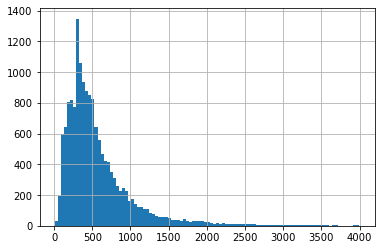

In [135]:
df[df['Length'] < 4000]['Length'].hist(bins=100)

In [136]:
df['Gene Ontology (molecular function)'] = df['Gene Ontology (molecular function)'].apply(lambda x: x.split(";")).apply(lambda x: [el[el.index("[GO")+1:-1] for el in x])

/tmp/ipykernel_1937/1620791387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gene Ontology (molecular function)'] = df['Gene Ontology (molecular function)'].apply(lambda x: x.split(";")).apply(lambda x: [el[el.index("[GO")+1:-1] for el in x])


In [137]:
df.iloc[0:2]

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Gene Ontology (molecular function),Gene Ontology (cellular component),Gene Ontology (biological process),Gene Ontology IDs,Gene Ontology (GO)
1,A0A024RBG1,NUD4B_HUMAN,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,Homo sapiens (Human),181,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,"[GO:0034431, GO:0034432, GO:0008486, GO:000029...",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,adenosine 5'-(hexahydrogen pentaphosphate) cat...,GO:0000298; GO:0003723; GO:0005634; GO:0005737...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
28,A0A075B6Q5,HV364_HUMAN,Immunoglobulin heavy variable 3-64,IGHV3-64,Homo sapiens (Human),118,MMEFGLSWVFLVAIFKGVQCEVQLVESGEGLVQPGGSLRLSCAASG...,[GO:0003823],extracellular region [GO:0005576]; immunoglobu...,immunoglobulin mediated immune response [GO:00...,GO:0003823; GO:0005576; GO:0005886; GO:0016064...,extracellular region [GO:0005576]; immunoglobu...


In [138]:
for k in slim_molecular_functions:
    df[ont.node(k)['label']] = df['Gene Ontology (molecular function)'].apply(lambda x: max([True if el in slim_molecular_functions_descendants[k] else False for el in x]))

/tmp/ipykernel_1937/1062818686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ont.node(k)['label']] = df['Gene Ontology (molecular function)'].apply(lambda x: max([True if el in slim_molecular_functions_descendants[k] else False for el in x]))
/tmp/ipykernel_1937/1062818686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ont.node(k)['label']] = df['Gene Ontology (molecular function)'].apply(lambda x: max([True if el in slim_molecular_functions_descendants[k] else False for el in x]))
/tmp/ipy

In [139]:
ohe_df = df.drop(columns=['Entry', 'Entry Name', 'Protein names', 'Gene Names', 'Organism',
                            'Length', 'Gene Ontology (molecular function)',
                            'Gene Ontology (cellular component)',
                            'Gene Ontology (biological process)', 'Gene Ontology IDs',
                            'Gene Ontology (GO)'])
ohe_df.head()

,Sequence,transporter activity,"catalytic activity, acting on a protein","catalytic activity, acting on DNA",RNA binding,cargo receptor activity,translation regulator activity,protein tag activity,molecular carrier activity,general transcription initiation factor activity,...,hydrolase activity,ligase activity,oxidoreductase activity,histone binding,catalytic activity,transferase activity,lipid binding,isomerase activity,DNA binding,cell adhesion mediator activity
1,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
28,MMEFGLSWVFLVAIFKGVQCEVQLVESGEGLVQPGGSLRLSCAASG...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,MKHLWFFLLLVAAPRWVLSQVQLQESGPGLVKPSGTLSLTCAVSGG...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38,MKSLRVLLVILWLQLSWVWSQQKEVEQNSGPLSVPEGAIASLNCTY...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43,MDKILGASFLVLWLQLCWVSGQQKEKSDQQQVKQSPQSLIVQKGGI...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
X = ohe_df['Sequence']
X

1        MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...
28       MMEFGLSWVFLVAIFKGVQCEVQLVESGEGLVQPGGSLRLSCAASG...
30       MKHLWFFLLLVAAPRWVLSQVQLQESGPGLVKPSGTLSLTCAVSGG...
38       MKSLRVLLVILWLQLSWVWSQQKEVEQNSGPLSVPEGAIASLNCTY...
43       MDKILGASFLVLWLQLCWVSGQQKEKSDQQQVKQSPQSLIVQKGGI...
                               ...                        
20419    MNGFASLLRRNQFILLVLFLLQIQSLGLDIDSRPTAEVCATHTISP...
20420    MGQTKSKIKSKYASYLSFIKILLKRGGVKVSTKNLIKLFQIIEQFC...
20421                             MDTQGFSCLLLLISEIDLSVKRRI
20422                             MATRGFSCLLLVISEIDLSVKRWV
20423    MALKEGLRAWKRIFWRQILLTLGLLGLFLYGLPKFRHLEALIPMGV...
Name: Sequence, Length: 16022, dtype: object

In [141]:
Y = ohe_df.drop(columns=["Sequence"])
labels = Y.columns
Y

,transporter activity,"catalytic activity, acting on a protein","catalytic activity, acting on DNA",RNA binding,cargo receptor activity,translation regulator activity,protein tag activity,molecular carrier activity,general transcription initiation factor activity,molecular adaptor activity,...,hydrolase activity,ligase activity,oxidoreductase activity,histone binding,catalytic activity,transferase activity,lipid binding,isomerase activity,DNA binding,cell adhesion mediator activity
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df[labels].to_numpy().astype(np.float32)
l = []
for i in range(X.shape[0]):
    l.append(torch.tensor(X[i,:]))
l

In [142]:
X, Y = X.to_numpy(), Y.to_numpy()

In [143]:
import numpy as np
Y = Y.astype(np.float32)

In [144]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# LLM Fine Tuning (using a Logistic Regression as Classification Head)
This way we take advantage of Logistic Regression multivariate response and perform independent classification of all the various classes

In [245]:
from datasets import Dataset

ds = Dataset.from_dict({"labels": l, "sequence" : df['Sequence']})
ds

Dataset({
    features: ['labels', 'sequence'],
    num_rows: 16022
})

In [125]:
from transformers import AutoTokenizer, EsmModel
import torch

#checkpoint = "facebook/esm2_t30_150M_UR50D"
checkpoint = "facebook/esm2_t12_35M_UR50D"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = EsmModel.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/778 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/136M [00:00<?, ?B/s]

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t12_35M_UR50D and are newly initialized: ['esm.pooler.dense.weight', 'esm.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [164]:
be = tokenizer("MAAVE", return_tensors="pt")
be['label'] = 0
be

{'input_ids': tensor([[ 0, 20,  5,  5,  7,  9,  2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]]), 'label': 0}

In [171]:
#import pytorch_lightning as pl
import torch.nn as nn
from transformers import Trainer

class ESMwithMultiClass(nn.Module):
    def __init__(self, num_labels=40, lr=1e-4):
        super().__init__()
        self.llm = model
        self.num_labels = num_labels
        self.clf = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.LazyLinear(out_features=self.num_labels),
            nn.Sigmoid()
        )
        self.lr = lr

    def forward(self, inputs, labels):
        return self.clf(self.llm(**inputs).pooler_output)
    
class MultilabelTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        logits = model(**inputs)
        #logits = outputs.get('logits')
        loss_fct = nn.BCELoss()
        loss = loss_fct(logits.view(-1, self.model.num_labels),
                        labels.float().view(-1, self.model.num_labels))
        return (loss, logits) if return_outputs else loss

In [172]:
esm = ESMwithMultiClass()